In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
mpl.rcParams['font.sans-serif'] = ['Times New Roman']
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import cv2 
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from utils.flow import * 

In [2]:
select_line = 300


In [3]:
frame_source = './speed_per_20.npz' # change frame source root

In [4]:
arr = load_frames(frame_source)

In [5]:
total_frame = arr.shape[0]

In [6]:
bgr = frames_to_bgrs(arr)

In [7]:
bgr.shape

(8, 540, 960, 3)

真实值

In [8]:
real_point = np.array("1.013	2.867	4.263	4.442	4.229	3.516	3.814	2.278".split("\t"), dtype="float")

In [9]:
real_indices = np.array([*range(0, 421, 60)]) # 真实距河岸位置

In [10]:
figure_indices = calc_flow_index(bgr, 1, y_ind=select_line, step=60, surface_width=420)

In [11]:
def calc_speed(arr : np.ndarray):
    return np.sqrt(arr[..., 0] ** 2 + arr[..., 1] ** 2)

In [12]:
v = calc_speed(arr)

In [17]:
dic 

{'frame_1',
 'frame_2',
 'frame_3',
 'frame_4',
 'frame_5',
 'frame_6',
 'frame_7',
 'frame_8'}

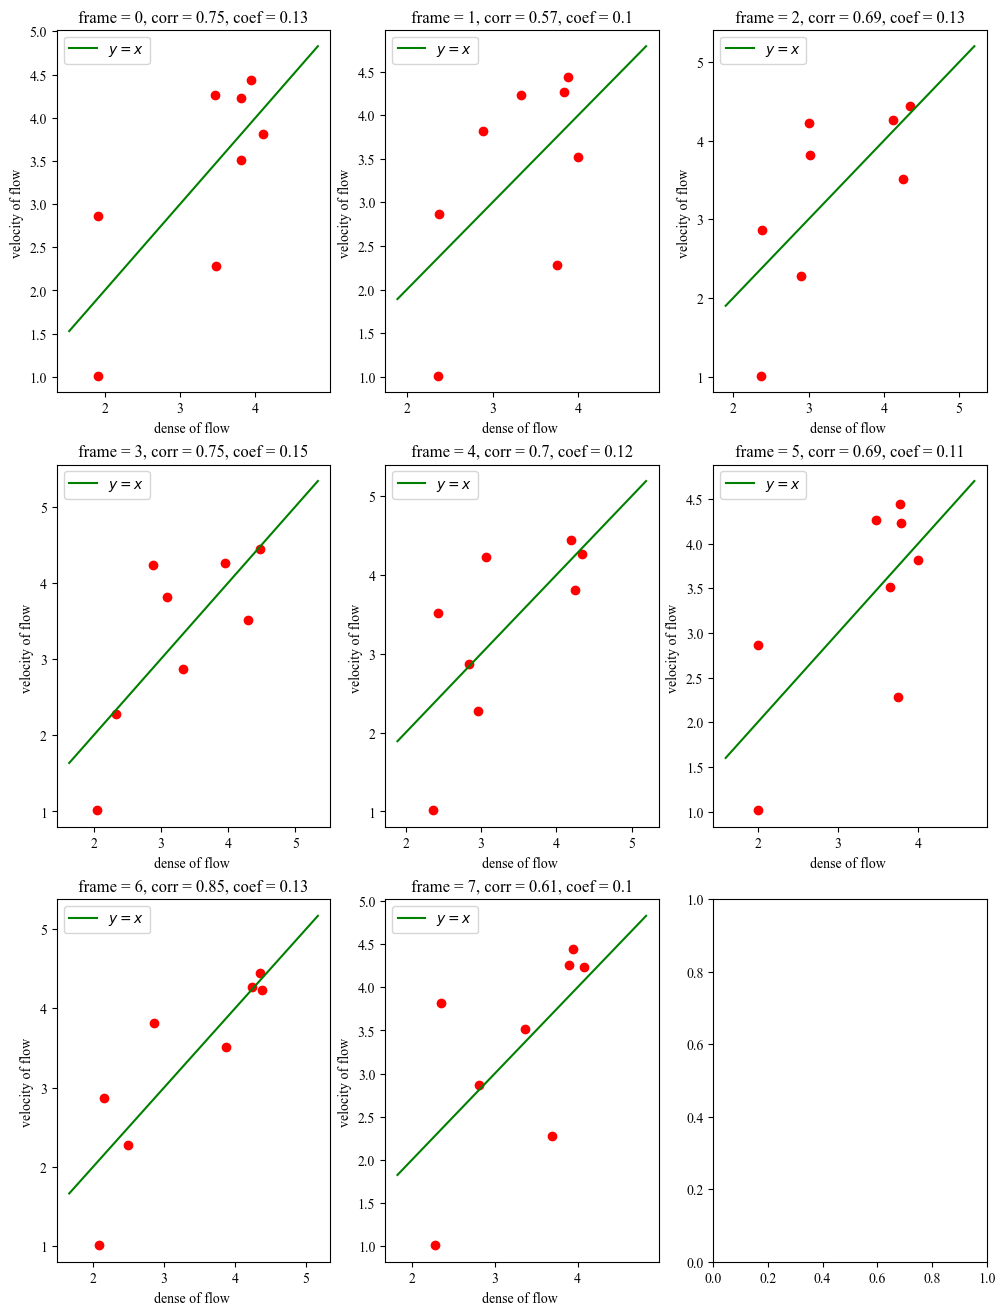

In [23]:
fig, axes = plt.subplots(int(np.sqrt(total_frame)) + 1, int(np.sqrt(total_frame)) + 1 )
fig.set_size_inches(12, 16)
dic = {f"frame_{i}" : None for i in range(1, total_frame + 1)}
for i in range(total_frame):
    ax = axes.flatten()[i]
    pred_speed = v[i, select_line, figure_indices]
    dic[f"frame_{i+1}"] = pred_speed
    lr = LinearRegression(fit_intercept=True)
    lr.fit(pred_speed.reshape(-1, 1), real_point)
    validate_speed = pred_speed * lr.coef_ + lr.intercept_
    step = np.arange(validate_speed.min() * 0.8 , validate_speed.max() * 1.2, 0.1)
    corr = pearsonr(pred_speed, real_point)[0]
    ax.scatter(validate_speed, real_point, color = "red")
    ax.plot(step, step , label = "$y = x$", color = "green")
    ax.set_xlabel("dense of flow ")
    ax.set_ylabel("velocity of flow ")
    ax.set_title(f"frame = {i}, corr = {round(corr, 2)}, coef = {np.round(lr.coef_[0], 2)}")
    
    ax.legend()

In [22]:
lr = LinearRegression(fit_intercept=True)
lr.fit(pred_speed.reshape(-1, 1), real_point)

LinearRegression()

In [24]:
validate_speed = pred_speed * lr.coef_ + lr.intercept_
validate_speed

array([2.36377454, 2.37032791, 3.83300232, 3.88442544, 3.32642462,
       3.9944462 , 2.8931351 , 3.75646386])

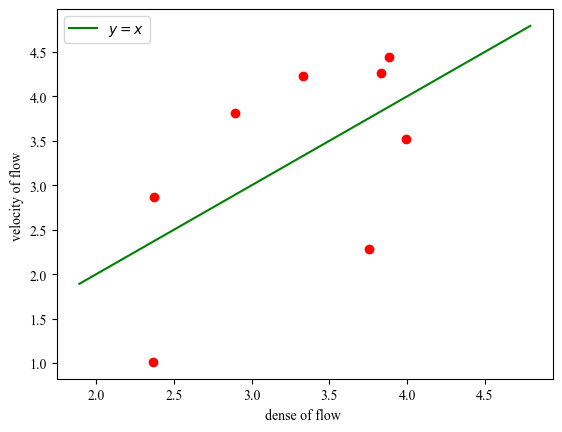

In [25]:
step = np.arange(validate_speed.min() * 0.8 , validate_speed.max() * 1.2, 0.1)
plt.scatter(validate_speed, real_point, color = "red")
plt.plot(step, step , label = "$y = x$", color = "green")
plt.xlabel("dense of flow ")
plt.ylabel("velocity of flow ")
plt.legend()